<a href="https://colab.research.google.com/github/akmal1994/Capstone-EDA-01-Airbnb/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Required Libraries

In [2]:
# import libraries
import pandas as pd  # for dataframe operations
import numpy as np   # for numrical computations
import matplotlib.pyplot as plt # for Visualization
import seaborn as sns  # for visualization
import warnings
warnings.filterwarnings('ignore')

### Load Dataset to working notebook

In [3]:
#top 5 rows of data frame
df = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/EDA-Capstone-AirBNB/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# last 5 rows of dataframe
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
df.shape

(48895, 16)

Dataset contains 48895 Rows and 16 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the above analysis, we can see that few columns having null values and 

In [7]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


**observations from Numeric Columns:**
- Few people who did not paid any amount for their stay as the minimum price is 0, and the maximum price is paid for stay is 10000.
- Minimum duration for booking is 1 and maximum is 1250 which is such a long stay.

In [8]:
df.describe(include='object').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


**Observations from Categorical Columns:**
- There are total 5 unique categories in neighbourhood_group, and Manhattan is highest frequescy having 21661 entries.
- There are total 3 type of room offered by AirBNB

As we see in above cell that dataset having some null values. So now checking the percentage of null values containing for each columns.

In [9]:
# Drop the columns which is not required for analysis
df.drop(columns=['name','host_id','host_name', 'latitude','longitude'], axis=1, inplace=True)
df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
df.shape

(48895, 10)

After droping some non-required features we have now 10 features in our dataset for further analysis.

In [10]:
# Checking the percentage of null values at each features
pd.DataFrame(round((df.isna().sum())/(len(df))*100,6), columns=['Null_Percent'])

,Null_Percent
id,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000
number_of_reviews,0.000000
last_review,20.558339
reviews_per_month,20.558339
calculated_host_listings_count,0.000000


Now check the number of null values by columns.

In [11]:
# Checking the total number of null values at each features
df.isna().sum()

id                                    0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

reviews_per_month and last_reviews containing 10052 null values, name and host_name is also having null values but these are not required for our analysis.

In [12]:
# To check the total number of unique values for each columns
df.nunique()

id                                48895
neighbourhood_group                   5
neighbourhood                       221
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
# Making id as index
df.set_index('id' ,inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Univariate Analysis

Text(0.5, 1.0, 'Price Distribution')

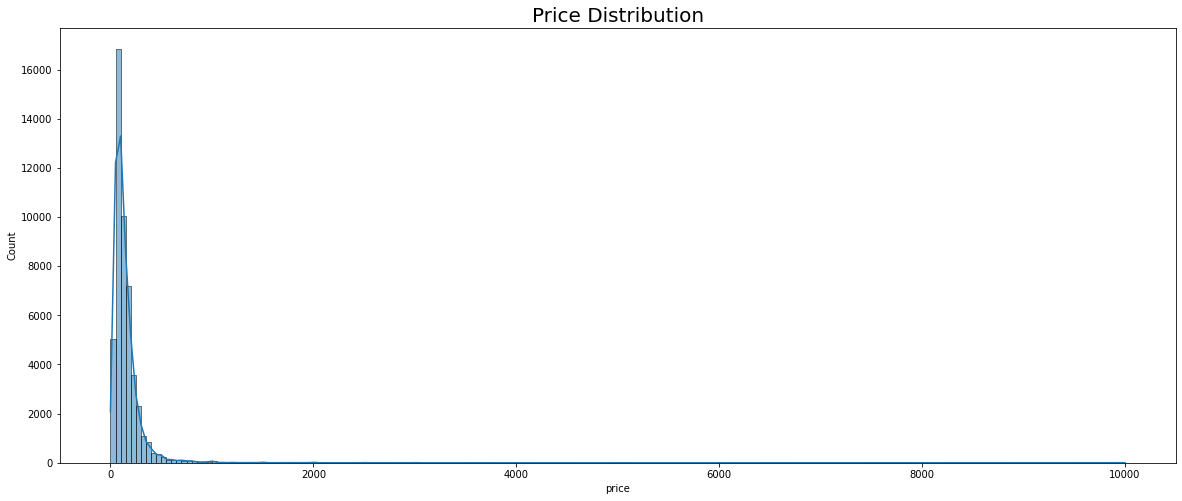

In [14]:
# Histogram plot to check the price distribution keeping kernel density estimator.
plt.figure(figsize=(20,8))
sns.histplot(df.price, kde=True, bins=200).set_title('Price Distribution', fontsize=20)

The distribution is positive skew, having long right tails.
The above distribution shows that majority of price is under 500.

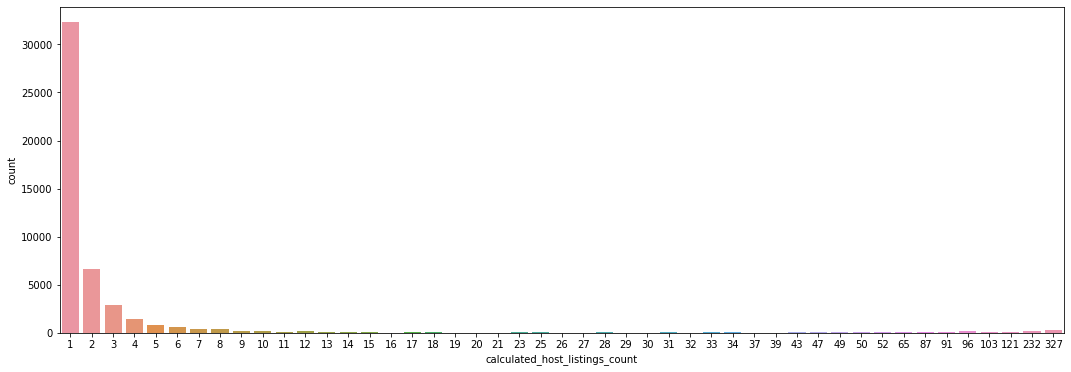

In [15]:
#Now I want to see the number of counts for "calculated_host_listings_count"
plt.figure(figsize=(18,6))
sns.countplot(df.calculated_host_listings_count)

In [32]:
# let's check the total count who did not paid any amount for stay.
print(len(df[df['price']==0]))

11


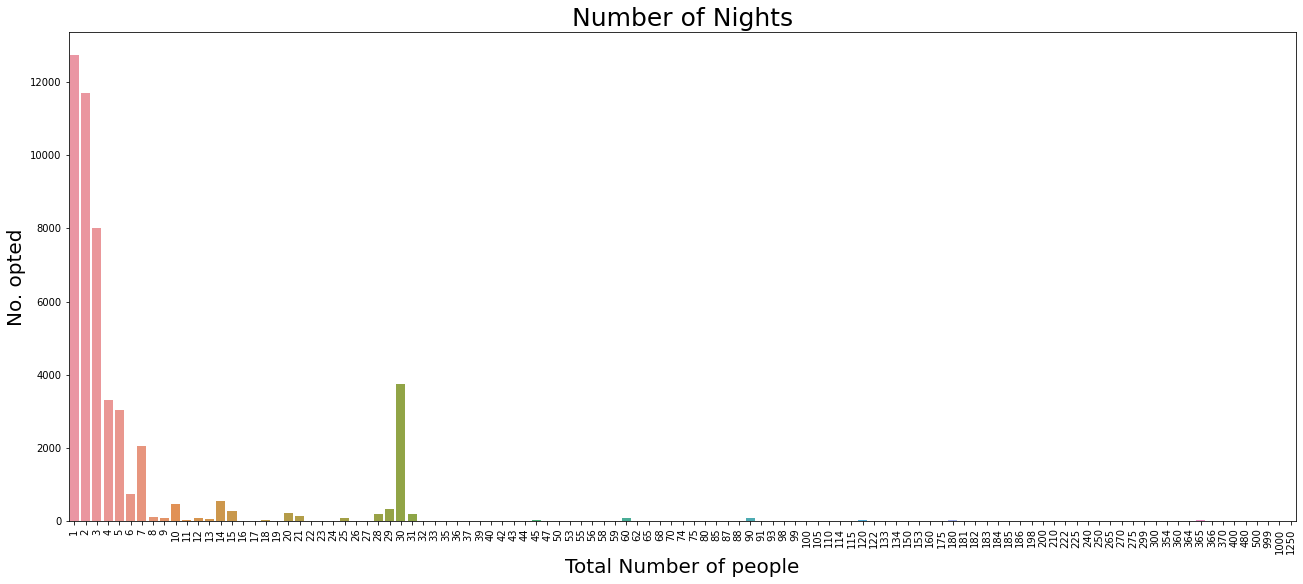

In [26]:
# To check the count of number of booked days
plt.figure(figsize=(22,9))
sns.countplot(df.minimum_nights).set_title('Number of Nights', fontsize=25);
plt.xlabel('Total Number of people', fontsize=20)
plt.ylabel('No. opted', fontsize=20)
plt.xticks(rotation=90);

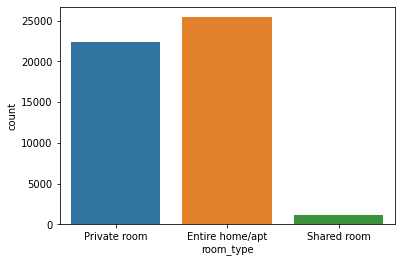

In [18]:
# Count of room type booked
sns.countplot(df.room_type)

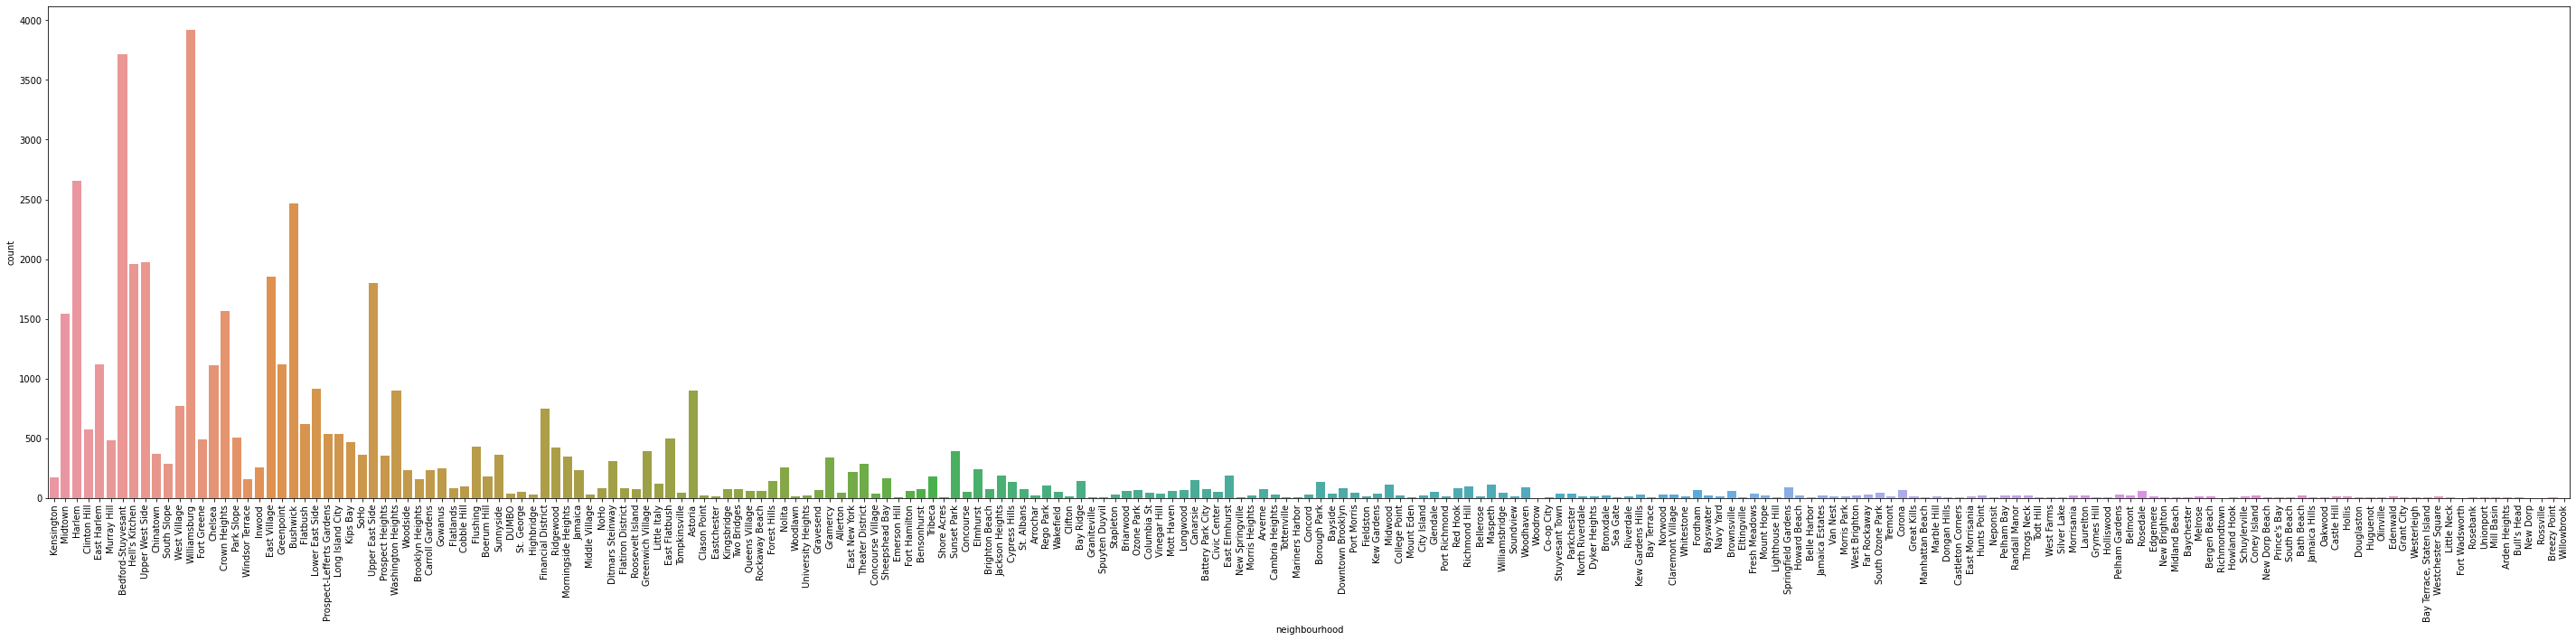

In [19]:
# Count of neighbourhood
plt.figure(figsize=(50,10))
sns.countplot(df.neighbourhood)
plt.xticks(rotation=90)
plt.show();

### Bivariate Analysis

room_type
Entire home/apt    5381480
Private room       2004450
Shared room          81348
Name: price, dtype: int64


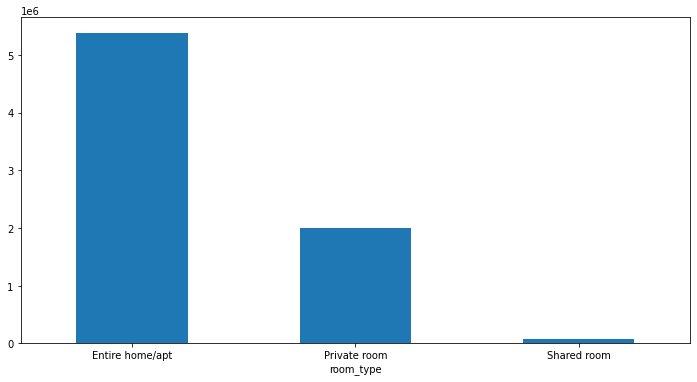

In [25]:
# Total price per room type
df.groupby('room_type').price.sum().plot(kind='bar', figsize=(12,6), rot=0)
print(df.groupby('room_type').price.sum())

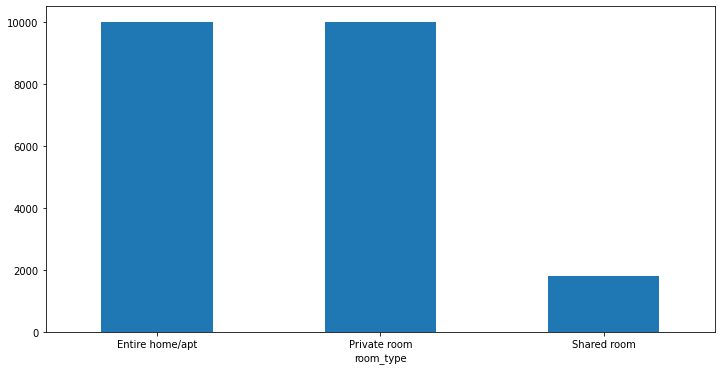

In [21]:
# Maximum price per room type
df.groupby('room_type').price.max().plot(kind='bar', figsize=(12,6), rot=0)

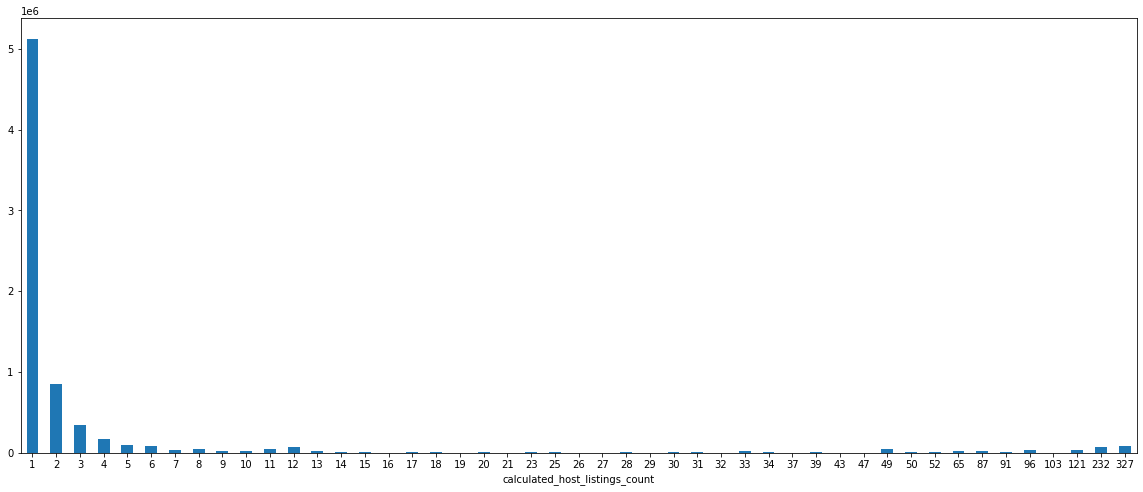

In [30]:
df.groupby('calculated_host_listings_count').price.sum().plot(kind='bar', figsize=(20,8), rot=0)

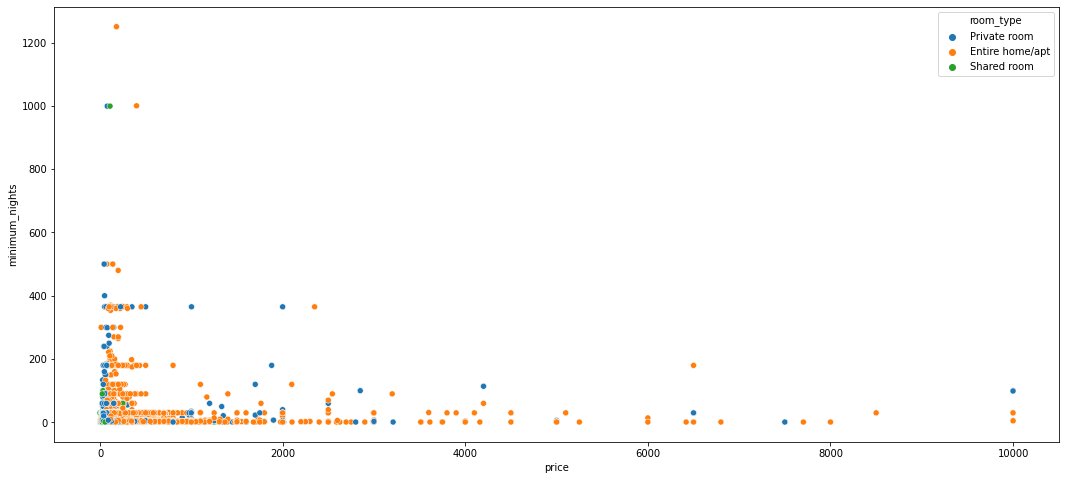

In [22]:
plt.figure(figsize=(18,8))
sns.scatterplot(df.price, df.minimum_nights, hue=df.room_type)

- From the observation it is clear that when price is low then stay duration is high for all type of room.
- Shared room is less preferred among this records, also price for shared room is less comparitively.
- Despite costly people book for apartment and records for stay is also longer.

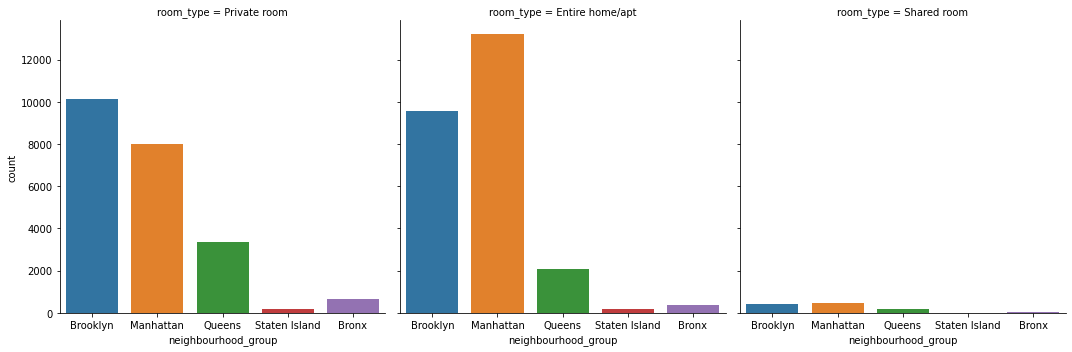

In [35]:
sns.factorplot("neighbourhood_group", col='room_type', data=df, kind='count');

neighbourhood group Brooklyn in private room is maximum and manhatten in apartment is maximum.

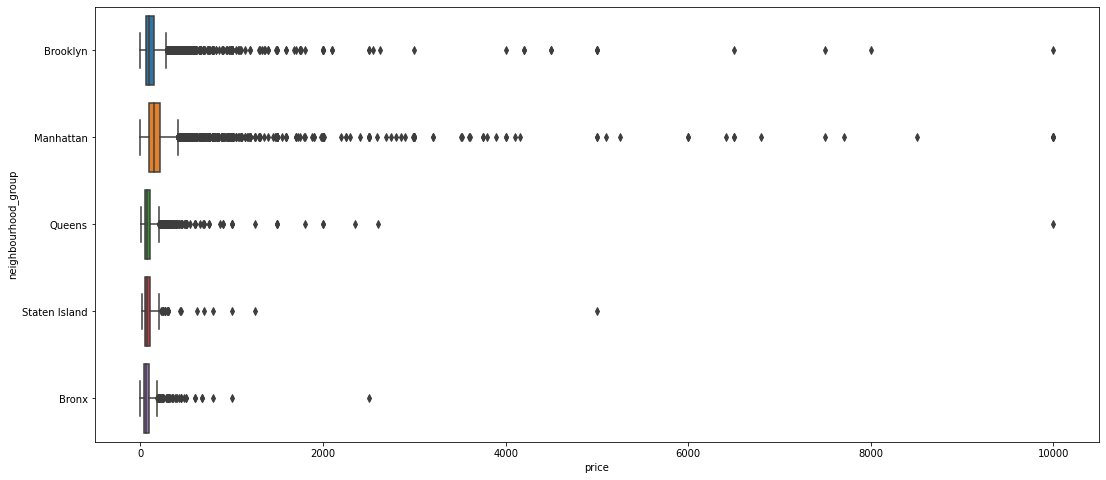

In [24]:
plt.figure(figsize=(18,8))
sns.boxplot(df['price'],df['neighbourhood_group'])